# Stations to be used for model evaluation

Station coordinates and sources gathered in: https://docs.google.com/spreadsheets/d/1UF5I5zyFDv2ucvm8AOHLB9DEjY9Q3sarYHAXSunIX3s/edit?usp=sharing

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import csv
import seaborn as sns
import matplotlib.image as mpimg
import pandas as pd

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


Load GEOTRACES data:

In [24]:
G2015    = pd.read_csv('/ocean/brogalla/GEOTRACES/data/combined_GEOTRACES2015.csv')
stn_lon  = np.array(G2015['Lon'].astype('float'))
stn_lat  = np.array(G2015['Lat'].astype('float'))

Model mesh:

In [19]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [20]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

Campbell and Yeats, 1982:

In [9]:
lat_1982 = [66.7567, 66.7483, 72.235, 74.333, 74.1783, 76.35167, 76.393, 78.32, 78.315, 66.7583]
lon_1982 = [-57.095, -60.25167, -65.9483, -94.263, -94.2433, -89.43, -89.305, -74.7167, \
           -74.2667, -57.0617]

Yeats and Westerlund (1991): 

In [10]:
lat_1991 = [81.723]
lon_1991 = [-93.4167]

Yeats (1988):

In [11]:
lat_1988 = [82, 86]
lon_1988 = [6, -111]

Nakayama et al. (2011):

In [12]:
lat_2011 = [73.4]
lon_2011 = [-152]

Charters (2012):

In [13]:
lat_2012 = [71.115, 72.51, 73.32, 74.393, 75.28, 71.183]
lon_2012 = [-139.33167, -136.59167, -139.39, -136.16, -137.56, -132.943]

Veron et al. (1999):

In [14]:
lat_1999 = [54.5]
lon_1999 = [-48.5]

Rijkenberg et al. (2014):

In [15]:
lat_2014 = [58.6022, 54.0634, 51.8209, 49.722, 47.8, 46.3119, 44.8423]
lon_2014 = [320.29309-360, 314.16479-360, 314.26849-360, 317.5531-360, \
            320.60049-360, 320.34161-360, 317.46851-360]

# Map of locations:

Syllabic names:

In [16]:
nv = mpimg.imread('/ocean/brogalla/GEOTRACES/figures/nunavut.png')
nwt = mpimg.imread('/ocean/brogalla/GEOTRACES/figures/NWT.png')

In [27]:
features = ['Arctic Ocean', 'Kalaallit Nunaat','Greenland', \
           'Northwest','Territories', 'Nunavut']
lon_features = [-129, -54, -54, \
                -132.5, -131.3, -105.5]
lat_features = [88, 79.5, 78.0, \
                64.1, 63.4, 64]

/home/brogalla/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4979: MatplotlibDeprecationWarning: The is_scalar function was deprecated in version 2.1.
  elif masked and is_scalar(masked):
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: Matplo

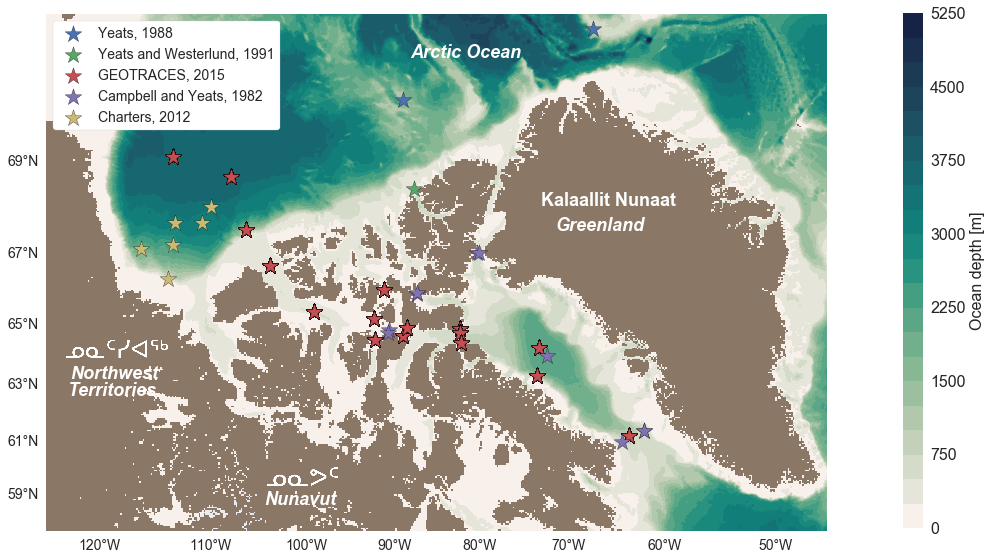

In [31]:
fig,ax = plt.subplots(figsize=(14,11))

proj=Basemap(projection='stere',lat_0 = 77.5, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6)
proj.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'h', zorder=3)

# bathymetry:
clevels=20
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,clevels, cmap=cmocean.cm.tempo)

# observations:
x_1988, y_1988 = proj(lon_1988, lat_1988)
proj.scatter(x_1988, y_1988, marker='*',s=300,zorder=4, \
             edgecolor='k', label= 'Yeats, 1988')    
x_1991, y_1991 = proj(lon_1991, lat_1991)
proj.scatter(x_1991, y_1991, marker='*',s=300,zorder=4, \
             edgecolor='k', label= 'Yeats and Westerlund, 1991')
x_GEO, y_GEO = proj(stn_lon, stn_lat)
proj.scatter(x_GEO, y_GEO, marker='*',s=300,zorder=4, \
             edgecolor='k', label= 'GEOTRACES, 2015')
x_1982, y_1982 = proj(lon_1982, lat_1982)
proj.scatter(x_1982, y_1982, marker='*',s=300,zorder=4, \
             edgecolor='k', label= 'Campbell and Yeats, 1982')
x_2012, y_2012 = proj(lon_2012, lat_2012)
proj.scatter(x_2012, y_2012, marker='*',s=300,zorder=4, \
             edgecolor='k', label= 'Charters, 2012')

# label features:
textx, texty = proj(lon_features, lat_features)
for i in range(len(features)):
    if features[i] == 'Kalaallit Nunaat':
        plt.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', color='w',zorder=4)
    else:
        plt.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', fontstyle='italic', color='w',zorder=4)

#nunavut:
ax3 = fig.add_axes([0.34, 0.22, 0.08, 0.05])
ax3.axis('off')
ax3.imshow(nv)
#northwest territories:
ax4 = fig.add_axes([0.14, 0.38, 0.11, 0.05])
ax4.axis('off')
ax4.imshow(nwt)
#---------------------
    
cbaxes = fig.add_axes([0.975, 0.18, 0.02, 0.65]) 

CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)
ax.legend(fontsize=14,loc=2,frameon=True, facecolor="white", framealpha=1)